Saving WhatsApp Image 2025-07-22 at 08.26.36.jpeg to WhatsApp Image 2025-07-22 at 08.26.36 (6).jpeg


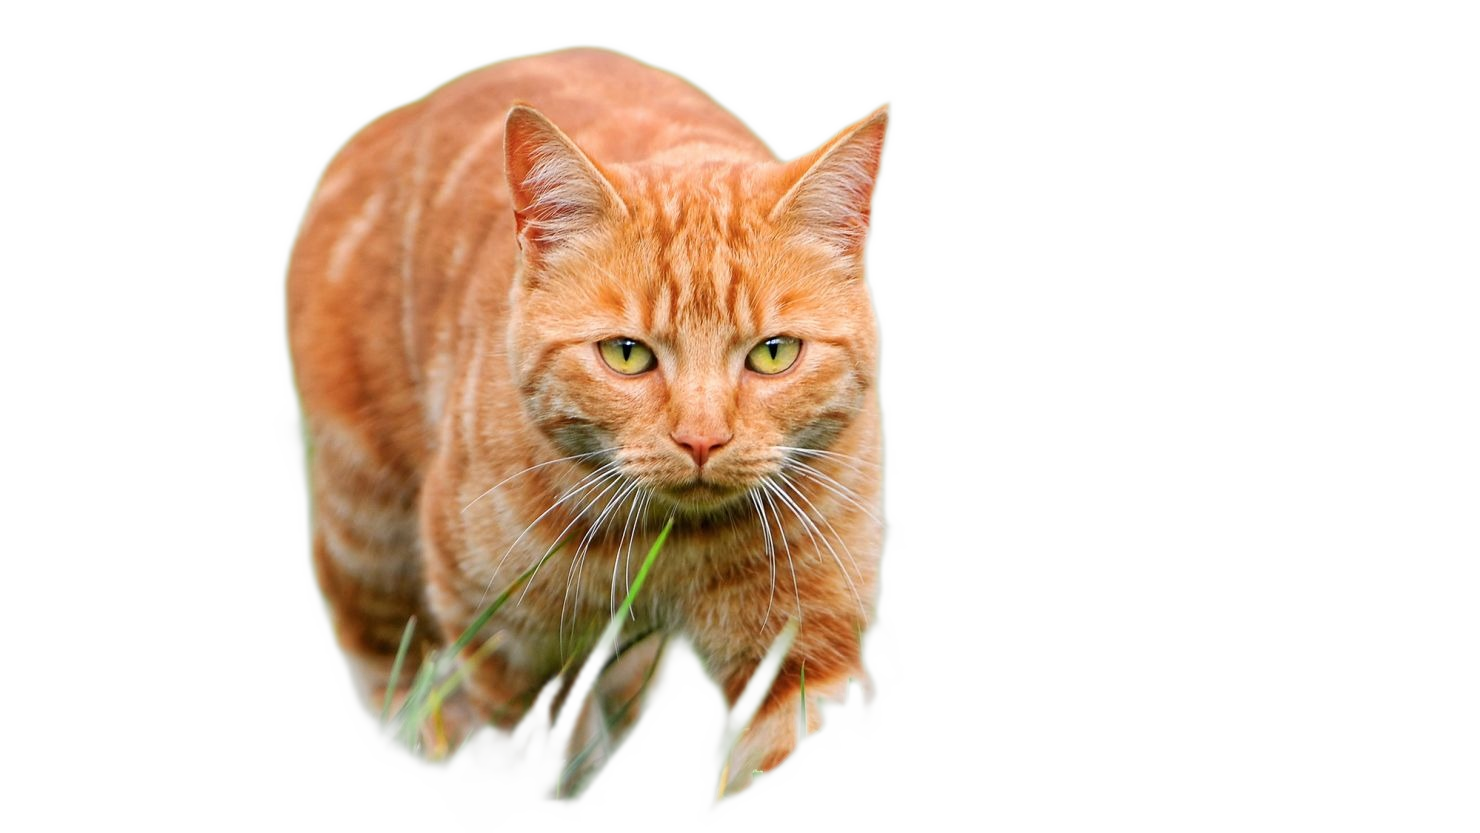

In [7]:
# Step 1: Install required libraries
!pip install -q rembg onnxruntime pillow opencv-python numpy

# Step 2: Upload your image
from google.colab import files
uploaded = files.upload()

# Step 3: Background removal
from rembg import remove
from PIL import Image
import io
import numpy as np
import cv2

# Read uploaded image
input_filename = next(iter(uploaded))
with open(input_filename, 'rb') as f:
    input_data = f.read()

# Remove background
output_data = remove(input_data)

# Load RGBA image
image = Image.open(io.BytesIO(output_data)).convert("RGBA")
image_np = np.array(image)

# Separate color and alpha
bgr = cv2.cvtColor(image_np[:, :, :3], cv2.COLOR_RGB2BGR)
alpha = image_np[:, :, 3]

# Step 4: Clean alpha mask by eroding and blurring (removes all color fringes)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
eroded_alpha = cv2.erode(alpha, kernel, iterations=1)
blurred_alpha = cv2.GaussianBlur(eroded_alpha, (5, 5), 0)

# Step 5: Optional feathering: blur RGB near edge to soften artifacts
mask_f = blurred_alpha.astype(float) / 255.0
mask_f = np.expand_dims(mask_f, axis=2)

# Blend original color with neutral background using feathered mask
blended = (bgr.astype(float) * mask_f + 255 * (1 - mask_f)).astype(np.uint8)

# Convert back to RGBA
final = cv2.cvtColor(blended, cv2.COLOR_BGR2RGB)
final_rgba = np.dstack((final, blurred_alpha))

# Step 6: Save and show result
output_path = 'cleaned_output.png'
Image.fromarray(final_rgba).save(output_path)

from IPython.display import Image as IPyImage
IPyImage(output_path)
